In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

article = """New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18."""

summary = summarizer(article, max_length=130, min_length=30)

In [ ]:
summary

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. If convicted, she faces up to four years in prison.'}]

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Final merge Data
final_data = pd.read_csv("/content/drive/MyDrive/CMU SUBJECTS/DATA/Clean Data/Coursera_Final_Merge_clean_Data.csv")
final_data = final_data[final_data["clean_reviews"].isna() == False]

In [ ]:
final_data.dtypes

name                 object
institution          object
course_url           object
course_id            object
World_Rank          float64
I_Category           object
subject              object
reviews              object
reviewers            object
date_reviews         object
rating                int64
clean_reviews        object
sentiments           object
sentiments_score    float64
lang_detect          object
dtype: object

In [ ]:
negative_reviews["clean_reviews"].head().tolist()

## **Topic Modeling Using TFIDF Vectorizer and LDA**

#### **TFIDF for full data:**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95,
                                min_df=100,
                                ngram_range = (3,3))
tfidf_all = tfidf_vectorizer.fit_transform(final_data["clean_reviews"])

In [ ]:
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tfidf_all)

LatentDirichletAllocation(random_state=0)

In [ ]:
import numpy as np
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])

In [ ]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tfidf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
really good course : 0.05560545868522859
one good course : 0.04464411119615214
great course thank : 0.03360507426083203
thank dr chuck : 0.030274466906669333
excellent course beginner : 0.027422704613453502
learn something new : 0.022751411050589494
would highly recommend : 0.02211091676379099
learn much course : 0.02175792998965397
really love course : 0.021262115541861328
great course get : 0.020152330766841156
course get start : 0.0201290700005753
definitely recommend course : 0.0188263003821531
good course get : 0.018206704424410615
course well organize : 0.016132777689794032
good starting point : 0.015810804534751793
excellent course well : 0.014733579326431457
recommend anyone interested : 0.013434141716094675
course deep learning : 0.013337363526422528
course datum science : 0.012739202328359728
course good beginner : 0.01228474650757915

[Topic 1]
course highly recommend : 0.05065047570

#### **TFIDF for Negative data**

In [ ]:
# Negative Review Data:
negative_reviews = final_data[final_data["sentiments"] == "Negative"].reset_index()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95,
                                min_df=10,
                                ngram_range = (3,3))
tfidf_neg = tfidf_vectorizer.fit_transform(negative_reviews["clean_reviews"])

In [ ]:
num_topics = 6

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tfidf_neg)

LatentDirichletAllocation(n_components=6, random_state=0)

In [ ]:
# doc to topic matrix:
doc_topic_matrix = lda.transform(tfidf_neg)
doc_topic_matrix.shape

(20141, 6)

In [ ]:
doc_topic_matrix

array([[0.04850845, 0.04846567, 0.04848226, 0.04855906, 0.75738797,
        0.04859658],
       [0.05695351, 0.05564996, 0.05569009, 0.05616703, 0.71909973,
        0.05643968],
       [0.04396486, 0.04394826, 0.04407478, 0.04441919, 0.04370472,
        0.7798882 ],
       ...,
       [0.34911775, 0.06907994, 0.06908011, 0.37451819, 0.06907985,
        0.06912416],
       [0.08333457, 0.08333458, 0.08333464, 0.08333459, 0.08333454,
        0.58332709],
       [0.06903804, 0.65451057, 0.06903817, 0.06903807, 0.06933712,
        0.06903804]])

In [ ]:
import numpy as np
doc_topic_matrix.shape
topic_num = []
for i in range(doc_topic_matrix.shape[0]):
    idx = np.argsort(doc_topic_matrix[i,:])
    topic_num.append("Topic "+str(idx[-1]))

In [ ]:
negative_reviews["topic_numbers"] = pd.Series(topic_num)

In [ ]:
negative_reviews.groupby(['topic_numbers'])['topic_numbers'].count()

topic_numbers
Topic 0    2353
Topic 1    2362
Topic 2    2230
Topic 3    2356
Topic 4    2434
Topic 5    8406
Name: topic_numbers, dtype: int64

In [ ]:
import numpy as np
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])

In [ ]:
num_top_words = 50

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tfidf_vectorizer)

Displaying the top 50 words per topic and their probabilities within the topic...

[Topic 0]
course extremely helpful : 0.043226939465550784
bad course ever : 0.038439362557634055
spend lot time : 0.0342787018800631
waste lot time : 0.03201714879368783
well put together : 0.03136884202280637
not learn anything : 0.026182033709591306
would give star : 0.022590202656243896
international criminal law : 0.022342365376741124
thank andrew ng : 0.022046783030056433
get hand dirty : 0.02164992577012322
not like course : 0.02105444681860382
not feel like : 0.0208801733061338
not worth money : 0.020489039841911114
course ever take : 0.02023619939932936
google cloud platform : 0.02015661308894388
not make sense : 0.0196398354811743
quite difficult understand : 0.01962503300059511
course really help : 0.019259221976491055
give course star : 0.01918630632598161
learn lot new : 0.018012772816798812
would recommend course : 0.01795565468509666
ibm data science : 0.017678409110330008
recommend take co

In [ ]:
neg_reviews = negative_reviews["clean_reviews"].tolist()[1]
print(neg_reviews)
aspects = []
for sentence in neg_reviews:
  doc = nlp(sentence)
  descriptive_term = ''
  target = ''
  for token in doc:
    print(token.dep_,token.pos_)
    if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
      target = token.text
    if token.pos_ == 'ADJ':
      prepend = ''
      for child in token.children:
        if child.pos_ != 'ADV':
          continue
        prepend += child.text + ' '
      descriptive_term = prepend + token.text
      aspects.append({'aspect': target, 'description': descriptive_term})
print(aspects)

## ASPECT BASED SENTIMENT ANALYSIS:

####  **Aspect Based Sentiment Analysis for all the data**

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## To understand the sentiment for each review for different aspects
import nltk
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define aspects
aspects = ["course","content","audio","video","material","feedback","lecture","instructor","professor","assignment","quiz"]

df_all_aspect_sentiments = pd.DataFrame()

for index, row in tqdm(final_data.iterrows(), total = len(final_data)):
    # Split the review into sentences and tokenize each sentence
    review = row["clean_reviews"].lower()
    sentences = nltk.sent_tokenize(review)

    # For each aspect, extract the sentences that mention the aspect
    aspect_sentences = {}
    for aspect in aspects:
        aspect_sentences[aspect] = []
        for sentence in sentences:
            if aspect in sentence:
                aspect_sentences[aspect].append(sentence)

    # Calculate the sentiment score for each aspect sentence using VADER sentiment analysis
    aspect_sentiments = {}
    for aspect in aspects:
        aspect_sentiments[aspect] = []
        for sentence in aspect_sentences[aspect]:
            sentiment = sia.polarity_scores(sentence)["compound"]
            aspect_sentiments[aspect].append(sentiment)

    # Calculate the average sentiment score for each aspect
    aspect_sentiment_scores = {}
    aspect_sentiment_scores["Course_Category"] = row["subject"]
    aspect_sentiment_scores["Course_Name"] = row["name"]
    aspect_sentiment_scores["Review"] = row["reviews"]
    aspect_sentiment_scores["Clean_Review"] = row["clean_reviews"]
    for aspect in aspects:
        if len(aspect_sentences[aspect]) > 0:
            aspect_sentiment_scores[aspect] = sum(aspect_sentiments[aspect]) / len(aspect_sentences[aspect])
        else:
            aspect_sentiment_scores[aspect] = 0
    
    df_temp = pd.DataFrame(aspect_sentiment_scores,index=[index])
    df_all_aspect_sentiments = pd.concat([df_all_aspect_sentiments, df_temp])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 424380/424380 [3:33:08<00:00, 33.19it/s]


In [ ]:
df_all_aspect_sentiments.to_csv('/content/drive/MyDrive/CMU SUBJECTS/DATA/Clean Data/df_all_aspect_sentiments.csv', index=False)

In [ ]:
grouped_df = df_all_aspect_sentiments.groupby("Course_Category").agg({"course":"mean","content":"mean",
                                   "audio":"mean","video":"mean",
                                   "material":"mean","feedback":"mean",
                                   "lecture":"mean","instructor":"mean",
                                   "professor":"mean","assignment":"mean","quiz":"mean"})

NameError: ignored

In [ ]:
grouped_df

,course,content,audio,video,material,feedback,lecture,instructor,professor,assignment,quiz
Course_Category,,,,,,,,,,,
Arts and Humanities,0.339367,0.026043,0.000703,0.027609,0.026382,0.004760,0.021104,0.019044,0.030964,0.023517,0.004891
Business,0.309477,0.034971,0.000522,0.017092,0.026196,0.001046,0.022473,0.016972,0.047519,0.011108,0.007513
Computer Science,0.324277,0.021587,0.000068,0.018858,0.021079,0.000717,0.022337,0.042355,0.023453,0.029494,0.008452
Data Science,0.291508,0.023467,0.000178,0.018684,0.021178,0.000584,0.018243,0.019272,0.013337,0.031797,0.009424
Health,0.299634,0.021501,0.000351,0.016695,0.020760,0.000438,0.023412,0.014387,0.020627,0.004544,0.008042
Information Technology,0.266184,0.025159,-0.000119,0.014946,0.017583,0.000309,0.007705,0.023162,0.003322,0.006083,0.005604
Language Learning,0.321921,0.014610,0.000227,0.017757,0.013535,0.001447,0.012291,0.019899,0.017290,0.005659,0.006050
Math and Logic,0.292610,0.026651,0.000225,0.026396,0.032600,0.001010,0.036589,0.031234,0.028375,0.016111,0.015029
Personal Development,0.370924,0.026030,-0.000028,0.021550,0.027675,0.000788,0.017978,0.023868,0.030772,0.005763,0.005365


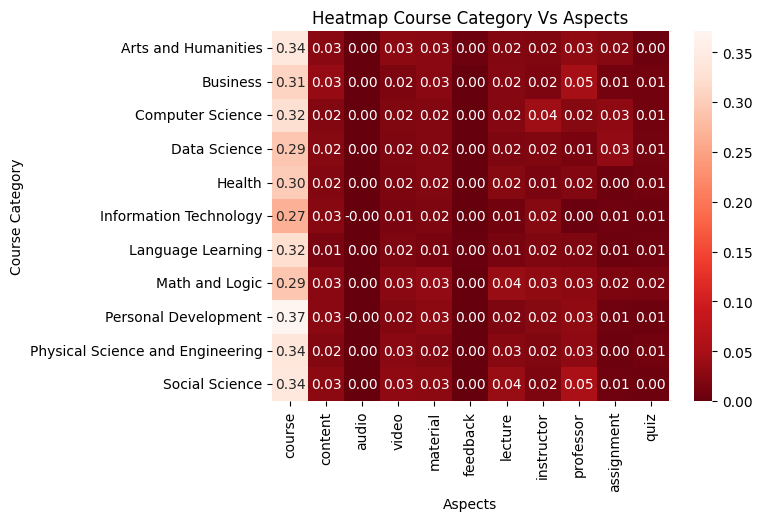

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(grouped_df, cmap=cmap, annot=True, fmt=".2f", cbar=True)

# Set plot title and axis labels
plt.title("Heatmap Course Category Vs Aspects")
plt.xlabel("Aspects")
plt.ylabel("Course Category")

# Show the plot
plt.show()

In [ ]:
grouped_df.columns
sel_cols =  ['course','audio', 'video', 'instructor', 'assignment', 'quiz']
temp_grp_df = grouped_df[sel_cols]

In [ ]:
# Number of review with negative comment for a given aspect (With Clean review column)
print("Course Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["course"] <0.0]),"\n",
      "Content Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["content"] <0.0]),"\n",
      "Audio Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["audio"] <0.0]),"\n",
      "Video Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["video"] <0.0]),"\n",
      "Feedback Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["feedback"] <0.0]),"\n",
      "Material Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["material"] <0.0]),"\n",
      "Lecture Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["lecture"] <0.0]),"\n",
      "Instructor Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["instructor"] <0.0]),"\n",
      "Professor Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["professor"] <0.0]),"\n",
      "Assignment Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["assignment"] <0.0]),"\n",
      "Quiz Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["quiz"] <0.0]),"\n"
      )

Course Count: 8715 
 Content Count: 1292 
 Audio Count: 318 
 Video Count: 2546 
 Feedback Count: 367 
 Material Count: 1503 
 Lecture Count: 1516 
 Instructor Count: 873 
 Professor Count: 579 
 Assignment Count: 3478 
 Quiz Count: 1828 



In [ ]:
# Number of review with Neutral comment for a given aspect (With Clean review column)
print("Course Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["course"] == 0.0]),"\n",
      "Content Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["content"] == 0.0]),"\n",
      "Audio Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["audio"] == 0.0]),"\n",
      "Video Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["video"] == 0.0]),"\n",
      "Feedback Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["feedback"] == 0.0]),"\n",
      "Material Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["material"] == 0.0]),"\n",
      "Lecture Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["lecture"] == 0.0]),"\n",
      "Instructor Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["instructor"] == 0.0]),"\n",
      "Professor Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["professor"] == 0.0]),"\n",
      "Assignment Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["assignment"] == 0.0]),"\n",
      "Quiz Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["quiz"] == 0.0]),"\n"
      )

Course Count: 179375 
 Content Count: 405018 
 Audio Count: 423647 
 Video Count: 405706 
 Feedback Count: 423057 
 Material Count: 405996 
 Lecture Count: 407783 
 Instructor Count: 407709 
 Professor Count: 407800 
 Assignment Count: 404306 
 Quiz Count: 415404 



In [ ]:
# Number of review with Positive comment for a given aspect (With Clean review column)
print("Course Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["course"] > 0.0]),"\n",
      "Content Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["content"] > 0.0]),"\n",
      "Audio Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["audio"] > 0.0]),"\n",
      "Video Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["video"] > 0.0]),"\n",
      "Feedback Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["feedback"] > 0.0]),"\n",
      "Material Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["material"] > 0.0]),"\n",
      "Lecture Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["lecture"] > 0.0]),"\n",
      "Instructor Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["instructor"] > 0.0]),"\n",
      "Professor Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["professor"] > 0.0]),"\n",
      "Assignment Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["assignment"] > 0.0]),"\n",
      "Quiz Count:",len(df_all_aspect_sentiments[df_all_aspect_sentiments["quiz"] > 0.0]),"\n"
      )

Course Count: 236290 
 Content Count: 18070 
 Audio Count: 415 
 Video Count: 16128 
 Feedback Count: 956 
 Material Count: 16881 
 Lecture Count: 15081 
 Instructor Count: 15798 
 Professor Count: 16001 
 Assignment Count: 16596 
 Quiz Count: 7148 



#### **Aspect Based sentiment Analysis for Negative reviews only**

In [ ]:
## To understand the sentiment for each review for different aspects
import nltk
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define aspects
aspects = ["course","content","audio","video","material","feedback","lecture","instructor","professor","assignment","quiz"]

df_aspect_sentiments = pd.DataFrame()

for index, row in tqdm(negative_reviews.iterrows(), total = len(negative_reviews)):
    # Split the review into sentences and tokenize each sentence
    review = row["clean_reviews"].lower()
    sentences = nltk.sent_tokenize(review)

    # For each aspect, extract the sentences that mention the aspect
    aspect_sentences = {}
    for aspect in aspects:
        aspect_sentences[aspect] = []
        for sentence in sentences:
            if aspect in sentence:
                aspect_sentences[aspect].append(sentence)

    # Calculate the sentiment score for each aspect sentence using VADER sentiment analysis
    aspect_sentiments = {}
    for aspect in aspects:
        aspect_sentiments[aspect] = []
        for sentence in aspect_sentences[aspect]:
            sentiment = sia.polarity_scores(sentence)["compound"]
            aspect_sentiments[aspect].append(sentiment)

    # Calculate the average sentiment score for each aspect
    aspect_sentiment_scores = {}
    aspect_sentiment_scores["Course_Category"] = row["subject"]
    aspect_sentiment_scores["Course_Name"] = row["name"]
    aspect_sentiment_scores["Review"] = row["reviews"]
    aspect_sentiment_scores["Clean_Review"] = row["clean_reviews"]
    for aspect in aspects:
        if len(aspect_sentences[aspect]) > 0:
            aspect_sentiment_scores[aspect] = sum(aspect_sentiments[aspect]) / len(aspect_sentences[aspect])
        else:
            aspect_sentiment_scores[aspect] = 0
    
    df_temp = pd.DataFrame(aspect_sentiment_scores,index=[index])
    df_aspect_sentiments = pd.concat([df_aspect_sentiments, df_temp])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 20141/20141 [01:35<00:00, 210.73it/s]


In [ ]:
#main_df.iloc[1]["Review"]
df_aspect_sentiments

,Course_Category,Course_Name,Review,Clean_Review,course,content,audio,video,material,feedback,lecture,instructor,professor,assignment,quiz
0,Data Science,Machine Learning,This is an extremely basic course. Machine lea...,extremely basic course . machine learning buil...,-0.078889,0.000,0.0,-0.0075,0.00,0.000000,0.000000,0.000,0.0,-0.090476,-0.090476
1,Data Science,Machine Learning,This course is absolute garbage. You get no f...,course absolute garbage . get no feedback quiz...,0.024702,0.000,0.0,0.0000,0.00,-0.733333,-0.050298,0.000,-1.0,-1.000000,-1.000000
2,Data Science,Machine Learning,Have to give a star so I will give it one. Ot...,give star give one . other rate course highly ...,-0.010833,-0.125,0.0,0.0000,-0.05,-0.050000,0.000000,-0.125,0.0,-0.050000,-0.050000
3,Data Science,Machine Learning,I would rename this course as Programming Octa...,would rename course programming octave applica...,0.066667,0.000,0.0,-0.1500,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000
4,Data Science,Machine Learning,The course didn't convince me at all. Practice...,course not convince . practice application rea...,-0.012500,-0.400,0.0,0.0000,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20136,Arts and Humanities,Magic in the Middle Ages,boring but fun,boring fun,0.000000,0.000,0.0,0.0000,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000
20137,Social Science,Challenging Forensic Science: How Science Shou...,Difficult but interesting course. Topic (but t...,difficult interesting course . topic math stil...,0.000000,0.000,0.0,0.0000,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000
20138,Social Science,Challenging Forensic Science: How Science Shou...,It is a course to pay close attention because ...,course pay close attention type information te...,0.000000,0.000,0.0,0.0000,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000
20139,Social Science,Challenging Forensic Science: How Science Shou...,"A very helpful course, to understand how foren...",helpful course understand forensic result inte...,0.000000,0.000,0.0,0.0000,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000


In [ ]:
# Number of review with negative comment for a given aspect (With Clean review column)
print("Course Count:",len(df_aspect_sentiments[df_aspect_sentiments["course"] <0.0]),"\n",
      "Content Count:",len(df_aspect_sentiments[df_aspect_sentiments["content"] <0.0]),"\n",
      "Audio Count:",len(df_aspect_sentiments[df_aspect_sentiments["audio"] <0.0]),"\n",
      "Video Count:",len(df_aspect_sentiments[df_aspect_sentiments["video"] <0.0]),"\n",
      "Feedback Count:",len(df_aspect_sentiments[df_aspect_sentiments["feedback"] <0.0]),"\n",
      "Material Count:",len(df_aspect_sentiments[df_aspect_sentiments["material"] <0.0]),"\n",
      "Lecture Count:",len(df_aspect_sentiments[df_aspect_sentiments["lecture"] <0.0]),"\n",
      "Instructor Count:",len(df_aspect_sentiments[df_aspect_sentiments["instructor"] <0.0]),"\n",
      "Professor Count:",len(df_aspect_sentiments[df_aspect_sentiments["professor"] <0.0]),"\n",
      "Assignment Count:",len(df_aspect_sentiments[df_aspect_sentiments["assignment"] <0.0]),"\n",
      "Quiz Count:",len(df_aspect_sentiments[df_aspect_sentiments["quiz"] <0.0]),"\n"
      )

Course Count: 3357 
 Content Count: 486 
 Audio Count: 135 
 Video Count: 934 
 Feedback Count: 105 
 Material Count: 467 
 Lecture Count: 573 
 Instructor Count: 370 
 Professor Count: 190 
 Assignment Count: 1270 
 Quiz Count: 613 



In [ ]:
df = df_aspect_sentiments[(df_aspect_sentiments["course"] <0.0) |
(df_aspect_sentiments["content"] < 0.0) | 
(df_aspect_sentiments["audio"] < 0.0) |
(df_aspect_sentiments["video"] < 0.0) | 
(df_aspect_sentiments["feedback"] < 0.0) |
(df_aspect_sentiments["material"] < 0.0) |
(df_aspect_sentiments["lecture"] < 0.0) | 
(df_aspect_sentiments["instructor"] < 0.0) |
 (df_aspect_sentiments["professor"] < 0.0) |
 (df_aspect_sentiments["assignment"] < 0.0) |
 (df_aspect_sentiments["quiz"] < 0.0)]

In [ ]:
grouped_df = df.groupby("Course_Category").agg({"course":"mean","content":"mean",
                                   "audio":"mean","video":"mean",
                                   "material":"mean","feedback":"mean",
                                   "lecture":"mean","instructor":"mean",
                                   "professor":"mean","assignment":"mean","quiz":"mean"})

In [ ]:
grouped_df

,course,content,audio,video,material,feedback,lecture,instructor,professor,assignment,quiz
Course_Category,,,,,,,,,,,
Arts and Humanities,-0.107481,-0.007326,-0.013890,-0.018811,-0.002856,-0.027088,-0.012339,-0.022810,-0.022483,-0.050588,-0.024652
Business,-0.132659,-0.029179,-0.006719,-0.055133,-0.012733,-0.009229,-0.020789,-0.021199,-0.024534,-0.024806,-0.066812
Computer Science,-0.151274,-0.014710,-0.001190,-0.035743,-0.015484,-0.004405,-0.029428,-0.017700,-0.008121,-0.060482,-0.031041
Data Science,-0.133092,-0.017786,-0.006990,-0.049950,-0.017226,-0.004735,-0.029636,-0.013346,-0.002651,-0.088522,-0.020997
Health,-0.173239,-0.025950,-0.010980,-0.055704,-0.011270,-0.001186,-0.052594,-0.029875,-0.024526,0.000056,-0.056088
Information Technology,-0.143132,-0.021783,-0.048349,-0.057882,-0.024494,-0.003770,-0.012690,-0.034227,0.000009,-0.016365,-0.039261
Language Learning,-0.133663,-0.010124,-0.009134,-0.023559,-0.008350,-0.013457,-0.001597,-0.011455,-0.003734,-0.062548,-0.043944
Math and Logic,-0.150841,-0.005116,0.001810,-0.007817,-0.018635,0.000234,-0.031830,-0.019885,-0.007490,-0.095899,-0.023742
Personal Development,-0.148020,-0.020458,-0.009205,-0.051213,-0.018766,-0.003925,-0.030622,-0.006916,-0.010483,-0.009877,-0.025920


In [ ]:
grouped_df["course_content"] = grouped_df.apply(lambda x: (x["course"] + x["content"] + x["material"] + x["lecture"]) / 4, axis=1)

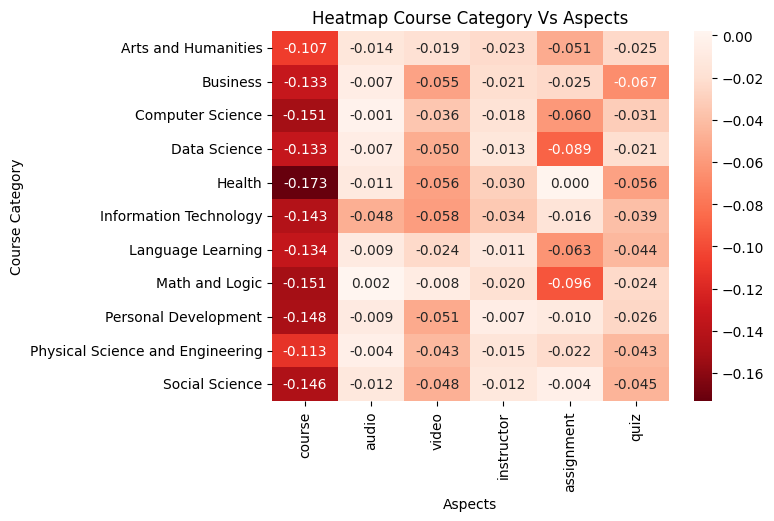

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_df.columns
sel_cols =  ['course','audio', 'video', 'instructor', 'assignment', 'quiz']
temp_grp_df = grouped_df[sel_cols]

cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(temp_grp_df, cmap=cmap, annot=True, fmt=".3f", cbar=True)

# Set plot title and axis labels
plt.title("Heatmap Course Category Vs Aspects")
plt.xlabel("Aspects")
plt.ylabel("Course Category")

# Show the plot
plt.show()

In [ ]:
## To get the exact line for which sentiment is negative for those aspects(Part 1)
import nltk
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re
#from transformers import pipeline

#summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
## To get the exact line for which sentiment is negative for those aspects(Part 2)
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define aspects
aspects = ["course","content","audio","video","material","feedback","lecture","instructor","professor","assignment","quiz"]

df_aspect_sentence_sentiments = pd.DataFrame()

for index, row in tqdm(negative_reviews.iterrows(), total = len(negative_reviews)):
    # Split the review into sentences
    review = row["clean_reviews"].lower()
    review = re.sub(r'(?<=\w)\.(?!\s|$)', '. ', review)
    sentences = nltk.sent_tokenize(review)


    # For each aspect, extract the sentences that mention the aspect
    aspect_sentences_sentiments = {}
    aspect_sentences_sentiments["Aspect"] = []
    aspect_sentences_sentiments["Sentence"] = []
    aspect_sentences_sentiments["Score"] = []
    #aspect_sentences_sentiments["Summary"] = []
    for aspect in aspects:
        for sentence in sentences:
            if aspect in sentence:
                #num_words = len(sentence.split())
                aspect_sentences_sentiments["Aspect"].append(aspect)
                aspect_sentences_sentiments["Sentence"].append(sentence)
                aspect_sentences_sentiments["Score"].append(sia.polarity_scores(sentence)["compound"])
                #aspect_sentences_sentiments["Summary"].append(summarizer(sentence, max_length=int(num_words/2)+1, min_length=int(num_words/2)))
                
    df_temp = pd.DataFrame(aspect_sentences_sentiments)
    df_aspect_sentence_sentiments = pd.concat([df_aspect_sentence_sentiments, df_temp])

100%|██████████| 20141/20141 [00:44<00:00, 451.87it/s]


In [ ]:
top_neg_sentences[top_neg_sentences["Aspect"] == "course"]

,Aspect,Sentence,Score
30,course,useful course learn cancer metastasis cancer imaging cancer prevention cancer screening cancer staging treatment .,-0.9686
31,course,every course life stress know happen study hard not like pupil fail frustrate angry disappoint sometimes would consider not go course even hurt promotion work etc .. afraid failure.,-0.9528
32,course,platform course may bad platform fail lot assign distant date pay study immediately wait two month postpone two month platform not respond neither university blame nobody answer bad investment lack seriousness nobody answer bad experience,-0.9498
33,course,course train we principle theory fraud detect fraudster classification fraudster also process use control fraud organisation .,-0.9393
34,course,instructor get bad bad video hard watch accent make even bad feel rob take course .,-0.9382
35,course,good cover basic not require live help answer question many resource available help testing able finish latethe bad terse impenetrable wording question problem bad subtitle require go back listen coursera s toolbar structure mid video question interface awful,-0.9234
36,course,make bad people point mistake error forum course maker either lazy not care enough fix it.,-0.9140
37,course,no way contact coursera bad bad bad ... never .,-0.9136
38,course,no course material except crappy unformatted transcript speed ridiculous didactically be disaster .,-0.9081
39,course,no faith organizer course follow reason poor audio quality unintelligible part point even transcript underneath video say inaudible time lack instruction topic still give we question quiz ask concept not cover obvious lack proof reading right answer wrong wrong answer right .,-0.9062


In [ ]:
pd.set_option('display.max_colwidth', 1000)
top_neg_sentences = df_aspect_sentence_sentiments.groupby('Aspect').apply(lambda x: x.nsmallest(10, 'Score')).reset_index(drop=True)

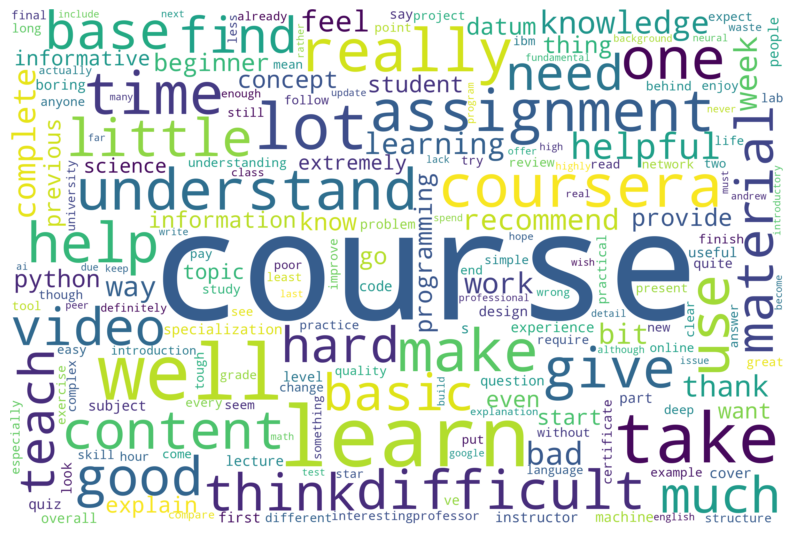

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

neg_line_list = " ".join(df_aspect_sentence_sentiments[df_aspect_sentence_sentiments["Aspect"] == "course"]["Sentence"].tolist())
word_cloud = WordCloud(collocations = False, background_color = 'white',width=3000, height=2000).generate(neg_line_list)
# Display the generated Word Cloud
plt.figure(figsize=[10,15])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
course_sentiment = main_df.groupby("Course_Name").mean().sort_values(by=["course"], ascending=True)
course_sentiment


<ipython-input-157-3da8b9b9c5e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  course_sentiment = main_df.groupby("Course_Name").mean().sort_values(by=["course"], ascending=True)


,course,content,concept,instructor,assignment,quiz
Course_Name,,,,,,
Devenir entrepreneur du changement,-0.52670,0.000000,0.0000,0.00000,0.0000,0.000000
Project Launch,-0.51060,-0.238350,0.0000,0.00000,0.0000,0.000000
Introduction to Economic Theories,-0.45060,-0.203533,0.0000,0.00000,0.0000,-0.083333
Introducción a Data Science: Programación Estadística con R,-0.42979,-0.093100,0.0000,-0.65600,-0.6249,0.000000
Anatomy: Musculoskeletal and Integumentary Systems,-0.42195,0.000000,0.0000,-0.42195,0.0000,0.000000
...,...,...,...,...,...,...
The Oral Cavity: Portal to Health and Disease,0.46655,0.000000,0.0000,0.00000,0.0000,0.000000
Understanding child development: from synapse to society,0.51060,0.000000,0.0000,0.00000,0.0000,0.000000
Foundations of Mindfulness,0.52295,0.000000,0.0000,-0.34540,0.0000,0.000000


In [ ]:
main_df.groupby("Course_Name").agg({'course':'mean',
                                    "content":'mean',
                                    "concept":'mean',
                                    "instructor":'mean',
                                    "assignment":'mean',
                                    "quiz":'mean'}).reset_index()

,Course_Name,course,content,concept,instructor,assignment,quiz
0,A Crash Course in Causality: Inferring Causal...,-0.126960,0.122480,-0.098860,0.000000,0.000000,0.000000
1,A Law Student's Toolkit,0.031018,0.003107,-0.065364,-0.034050,-0.010632,0.026407
2,AI For Everyone,0.274968,0.000000,0.029531,0.013029,0.000000,0.003242
3,AI for Medical Diagnosis,0.054355,0.000000,0.129036,0.032836,-0.054709,0.000000
4,AI for Medical Prognosis,0.000000,0.000000,-0.208600,0.000000,0.203867,-0.068567
...,...,...,...,...,...,...,...
542,e-Learning Ecologies: Innovative Approaches to...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
543,Étudier en France: French Intermediate course ...,-0.065700,0.000000,0.000000,0.000000,0.000000,0.000000
544,Математика и Python для анализа данных,-0.170550,0.000000,0.000000,0.000000,0.000000,0.000000
545,Основы программирования на Python,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
main_df.iloc[15102]["Review"]

'i supposed that may be i am not very clever so the content and the question after the class also make me confused. a little bit disapoint with this course. but i saw a lot people below think this a good course so may be i am wrong.'

In [ ]:
!pip install stanfordnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import stanfordnlp

# Make sure you have downloaded the StanfordNLP English model and other essential tools using,
# stanfordnlp.download('en')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

def aspect_sentiment_analysis(txt, stop_words, nlp):
    
    txt = txt.lower() # LowerCasing the given Text
    sentList = nltk.sent_tokenize(txt) # Splitting the text into sentences

    fcluster = []
    totalfeatureList = []
    finalcluster = []
    dic = {}

    for line in sentList:
        newtaggedList = []
        txt_list = nltk.word_tokenize(line) # Splitting up into words
        taggedList = nltk.pos_tag(txt_list) # Doing Part-of-Speech Tagging to each word

        newwordList = []
        flag = 0
        for i in range(0,len(taggedList)-1):
            if(taggedList[i][1]=="NN" and taggedList[i+1][1]=="NN"): # If two consecutive words are Nouns then they are joined together
                newwordList.append(taggedList[i][0]+taggedList[i+1][0])
                flag=1
            else:
                if(flag==1):
                    flag=0
                    continue
                newwordList.append(taggedList[i][0])
                if(i==len(taggedList)-2):
                    newwordList.append(taggedList[i+1][0])

        finaltxt = ' '.join(word for word in newwordList) 
        new_txt_list = nltk.word_tokenize(finaltxt)
        wordsList = [w for w in new_txt_list if not w in stop_words]
        taggedList = nltk.pos_tag(wordsList)

        doc = nlp(finaltxt) # Object of Stanford NLP Pipeleine
        
        # Getting the dependency relations betwwen the words
        dep_node = []
        for dep_edge in doc.sentences[0].dependencies:
            dep_node.append([dep_edge[2].text, dep_edge[0].index, dep_edge[1]])

        # Coverting it into appropriate format
        for i in range(0, len(dep_node)):
            if (int(dep_node[i][1]) != 0):
                dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]

        featureList = []
        categories = []
        for i in taggedList:
            if(i[1]=='JJ' or i[1]=='NN' or i[1]=='JJR' or i[1]=='NNS' or i[1]=='RB'):
                featureList.append(list(i)) # For features for each sentence
                totalfeatureList.append(list(i)) # Stores the features of all the sentences in the text
                categories.append(i[0])

        for i in featureList:
            filist = []
            for j in dep_node:
                if((j[0]==i[0] or j[1]==i[0]) and (j[2] in ["nsubj", "acl:relcl", "obj", "dobj", "agent", "advmod", "amod", "neg", "prep_of", "acomp", "xcomp", "compound"])):
                    if(j[0]==i[0]):
                        filist.append(j[1])
                    else:
                        filist.append(j[0])
            fcluster.append([i[0], filist])
            
    for i in totalfeatureList:
        dic[i[0]] = i[1]
    
    for i in fcluster:
        if(dic[i[0]]=="NN"):
            finalcluster.append(i)
        
    return(finalcluster)

In [ ]:
stanfordnlp.download('en')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:41<00:00, 5.63MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nlp = stanfordnlp.Pipeline()
stop_words = set(stopwords.words('english'))
txt = "The Sound Quality is great but the battery life is very bad."

print(aspect_sentiment_analysis(txt, stop_words, nlp))

Use device: gpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand

RuntimeError: ignored

In [ ]:
# Remove common words:
common_words = ["course","courses","learn","learning","I","good","great","."]

def remove_common_words(text):
    result = []
    for token in text.split():
        if token not in common_words:
            result.append(token)
    return(" ".join(result))

final_data.loc[:, 'clean_reviews'] = final_data['clean_reviews'].astype(str).apply(remove_common_words)

In [ ]:
from collections import Counter

negative_reviews = final_data[final_data.sentiments == "Negative"].clean_reviews
text = ' '.join(negative_reviews.tolist())
tokens = text.split()
neg_bigrams = [(tokens[i], tokens[i+1], tokens[i+2]) for i in range(len(tokens)-2)]
neg_bigram_counts = Counter(neg_bigrams)

# Print the top 20 most frequent bigrams
neg_bigram_pairs = neg_bigram_counts.most_common(10)
print(neg_bigram_pairs)

positive_reviews = final_data[final_data.sentiments == "Positive"].clean_reviews
text = ' '.join(positive_reviews.tolist())
tokens = text.split()
pos_bigrams = [(tokens[i], tokens[i+1], tokens[i+2]) for i in range(len(tokens)-2)]
pos_bigram_counts = Counter(pos_bigrams)

# Print the top 20 most frequent bigrams
pos_bigram_pairs = pos_bigram_counts.most_common(10)
print(pos_bigram_pairs)

[(('would', 'not', 'recommend'), 92), (('peer', 'grade', 'assignment'), 74), (('approximately', 'hour', 'completecourse'), 64), (('hour', 'completecourse', 'approximately'), 64), (('completecourse', 'approximately', 'hour'), 64), (('little', 'bit', 'hard'), 59), (('peer', 'review', 'assignment'), 53), (('little', 'bit', 'difficult'), 49), (('ibm', 'watson', 'studio'), 45), (('be', 'not', 'sure'), 44)]
[(('introduction', 'datum', 'science'), 356), (('would', 'like', 'thank'), 230), (('google', 'cloud', 'platform'), 220), (('thank', 'dr', 'chuck'), 219), (('thank', 'andrew', 'ng'), 198), (('would', 'recommend', 'anyone'), 188), (('can', 'not', 'wait'), 182), (('prof', 'andrew', 'ng'), 159), (('start', 'datum', 'science'), 159), (('excellent', 'highly', 'recommend'), 154)]


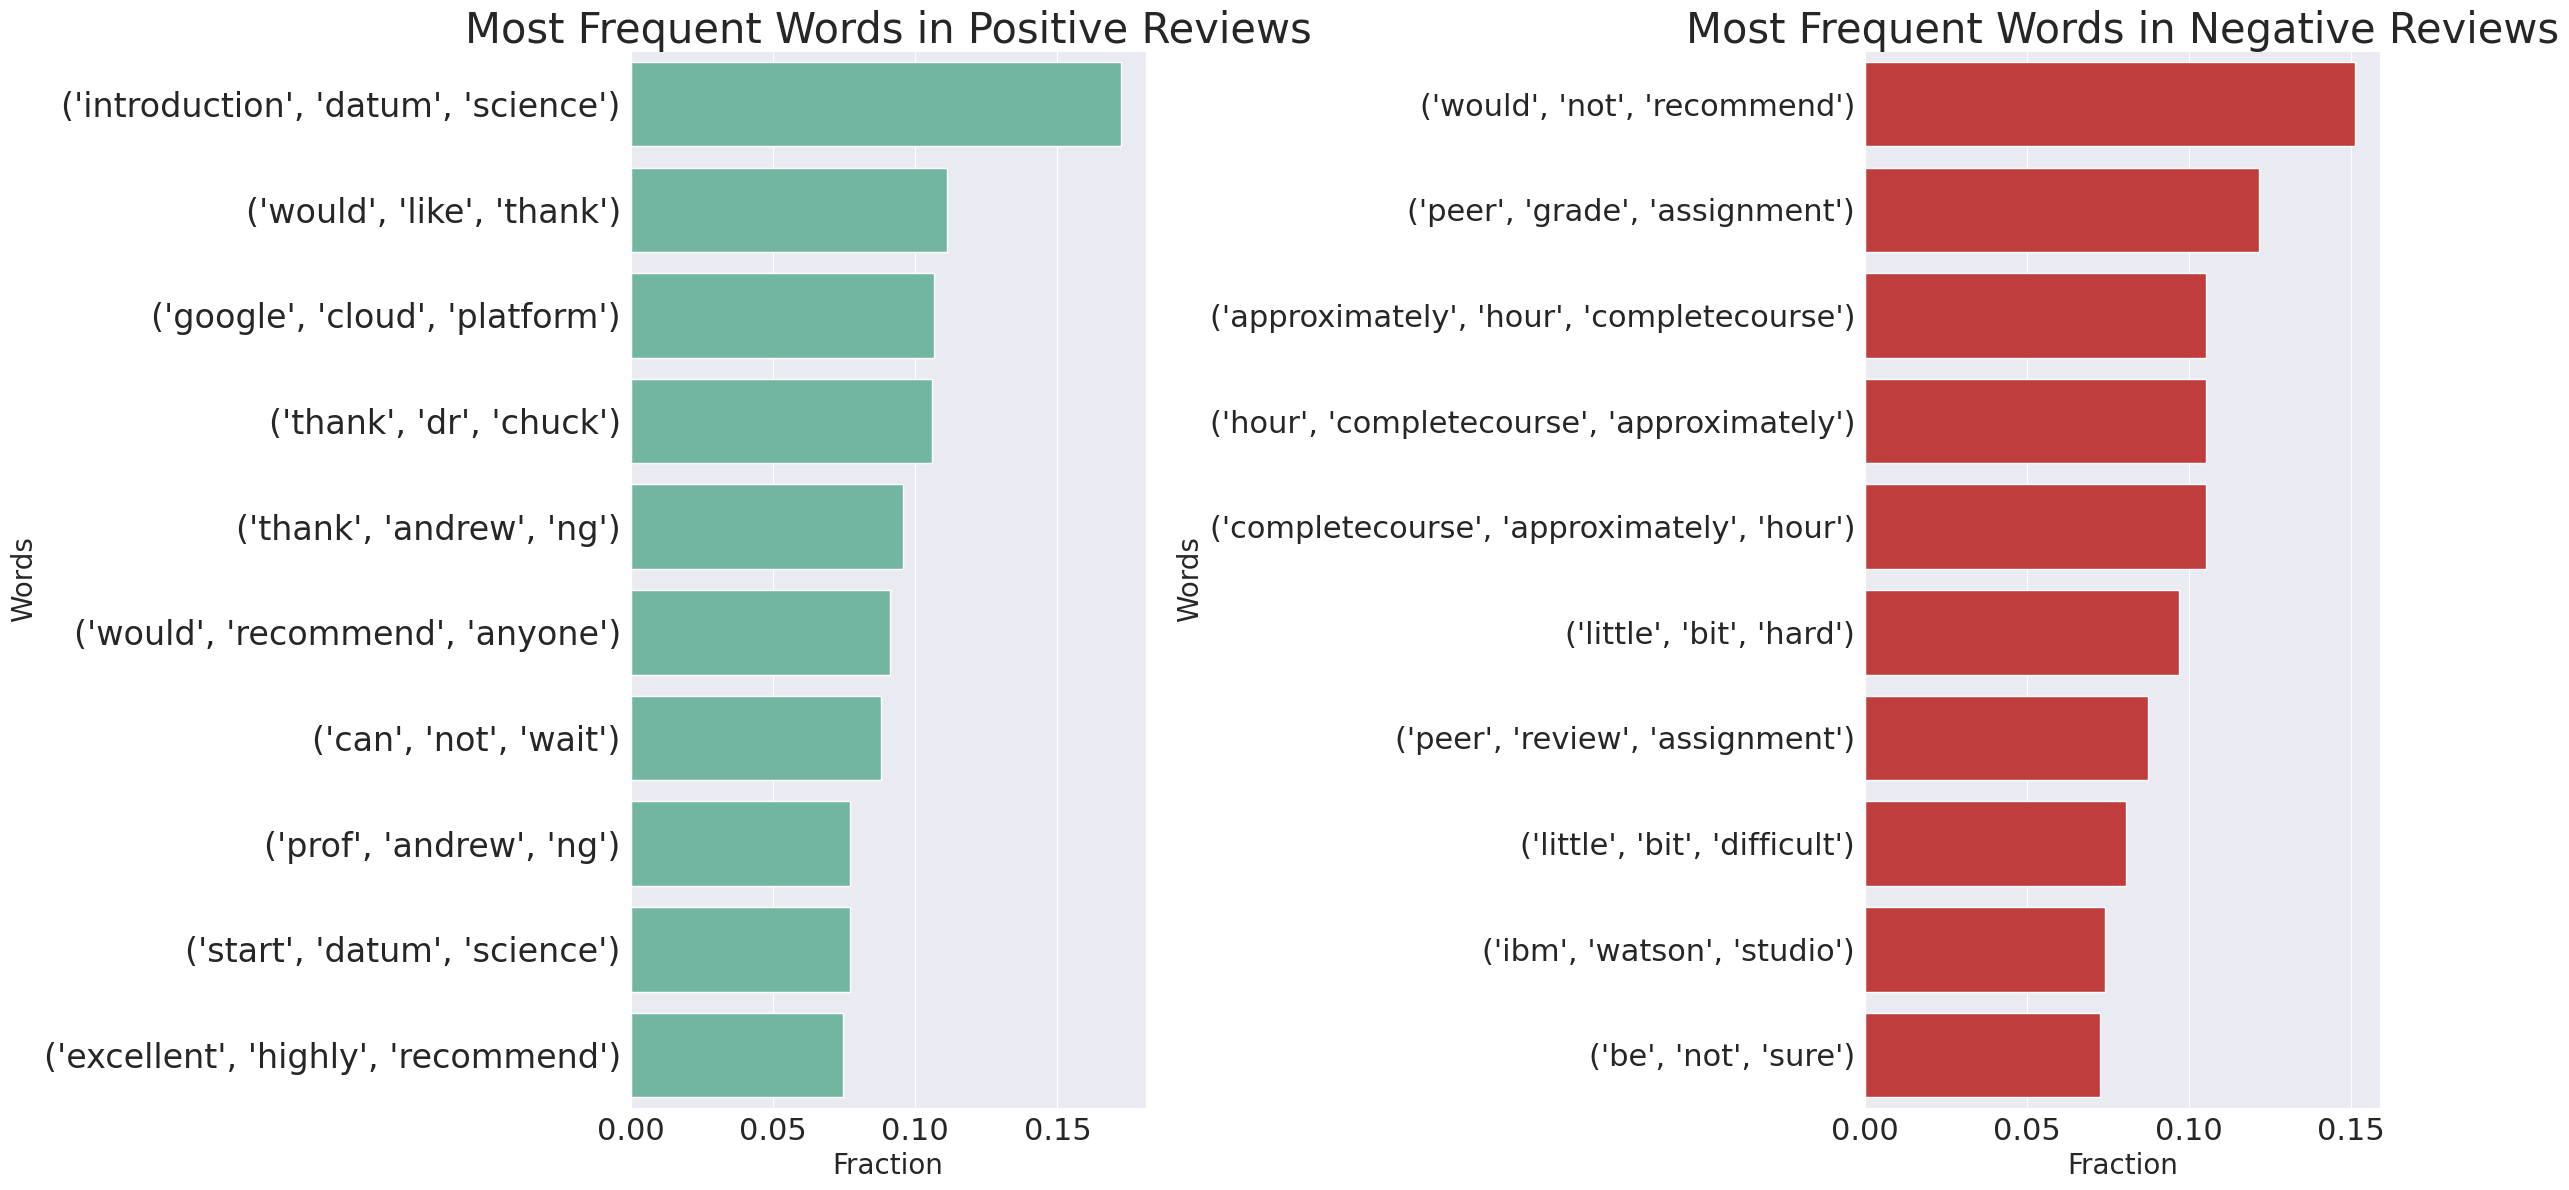

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pos_total_count = sum(count for _, count in pos_bigram_pairs)
neg_total_count = sum(count for _, count in neg_bigram_pairs)

colors = sns.color_palette("Set2")
color = colors[0]

sns.set_style("darkgrid")
fig, axs = plt.subplots(ncols=2, figsize=(24, 12)) # create a figure with two subplots
axs[0].set_title('Most Frequent Words in Positive Reviews', fontsize=30)
sns.barplot(ax=axs[0], x=[count/pos_total_count for _, count in pos_bigram_pairs], y=[str(bigram) for bigram, _ in pos_bigram_pairs], color=color)
axs[0].set_xlabel('Fraction',fontsize=20)
axs[0].set_ylabel('Words',fontsize=20)
axs[0].tick_params(axis='y', labelsize=24)
axs[0].tick_params(axis='x', labelsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


colors = sns.color_palette()
color = colors[3]

sns.set_style("darkgrid")
axs[1].set_title('Most Frequent Words in Negative Reviews', fontsize=30)
sns.barplot(ax=axs[1], x=[count/neg_total_count for _, count in neg_bigram_pairs], y=[str(bigram) for bigram, _ in neg_bigram_pairs], color=color)
axs[1].set_xlabel('Fraction',fontsize=20)
axs[1].set_ylabel('Words', fontsize=20)
# plt.tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='y', labelsize=24)
axs[1].tick_params(axis='x', labelsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


plt.tight_layout()
#plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9)
plt.savefig('tri_grams.png', dpi=1200)

plt.show()
